In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv('/content/Zoo.csv')
data.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [ ]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
data.shape

(101, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
data.drop_duplicates()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
data.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [ ]:
data.duplicated().sum()

np.int64(0)

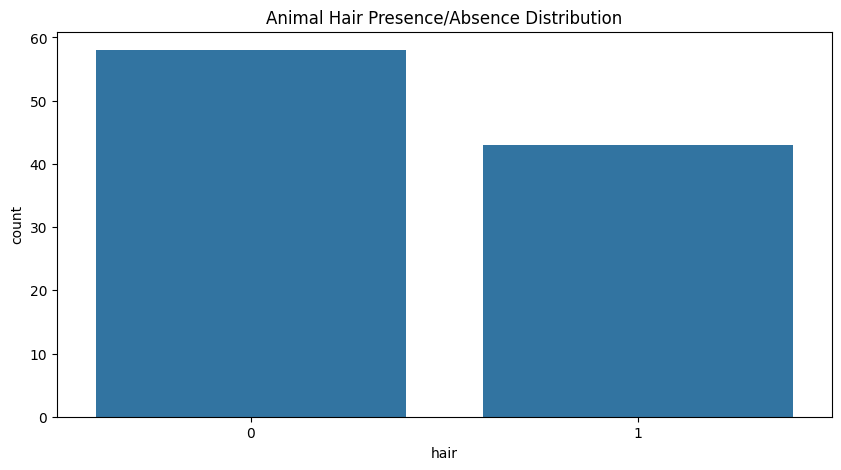

In [ ]:
sns.countplot(x='hair', data=data)
plt.title("Animal Hair Presence/Absence Distribution")
plt.xticks(rotation=0)
plt.show()

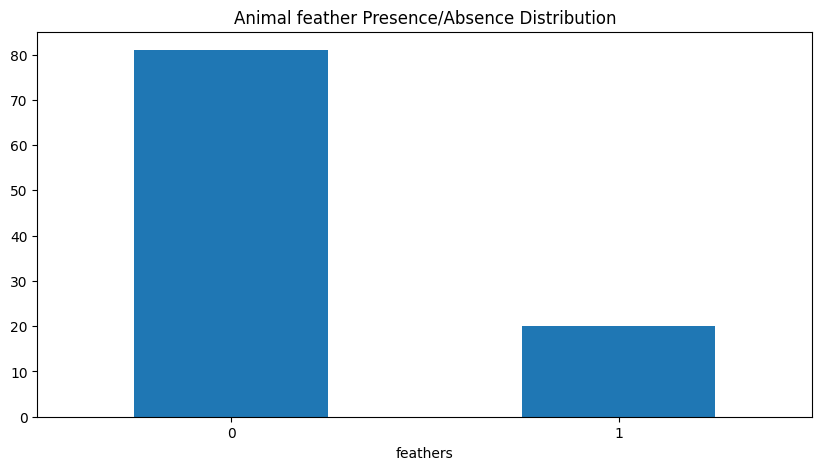

In [ ]:
data['feathers'].value_counts().plot(kind='bar')
plt.title("Animal feather Presence/Absence Distribution")
plt.xticks(rotation=0)
plt.show()

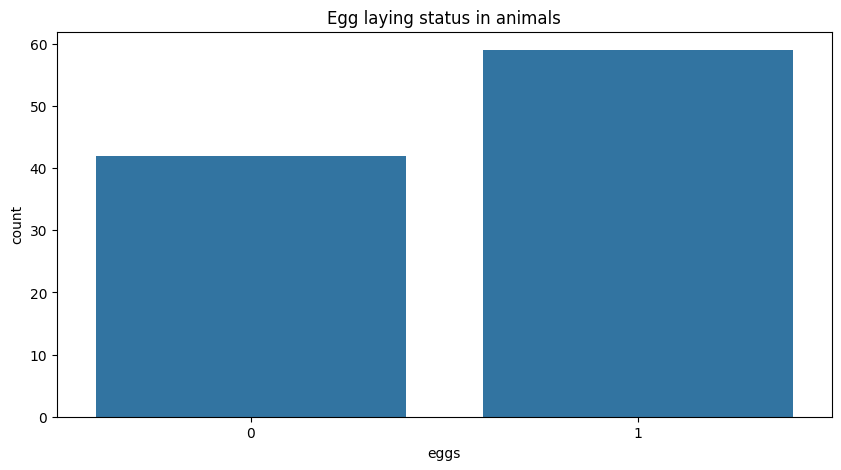

In [ ]:
sns.countplot(x='eggs', data=data)
plt.title("Egg laying status in animals")
plt.xticks(rotation=0)
plt.show()

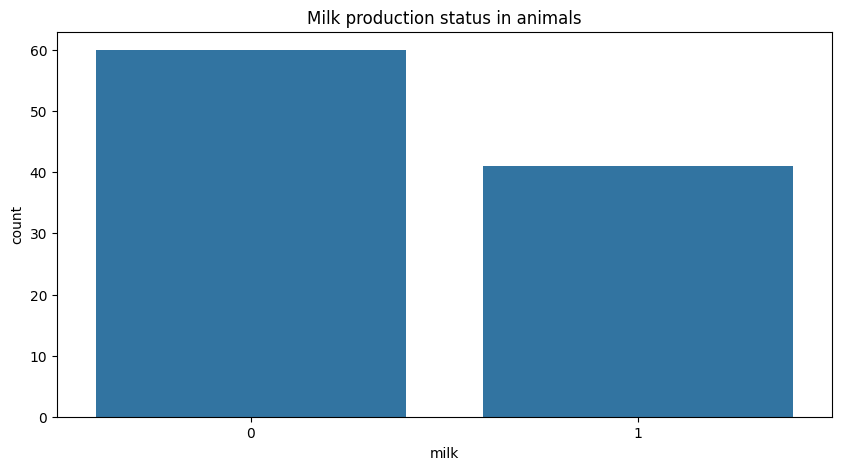

In [ ]:
sns.countplot(x='milk', data=data)
plt.title("Milk production status in animals")
plt.xticks(rotation=0)
plt.show()


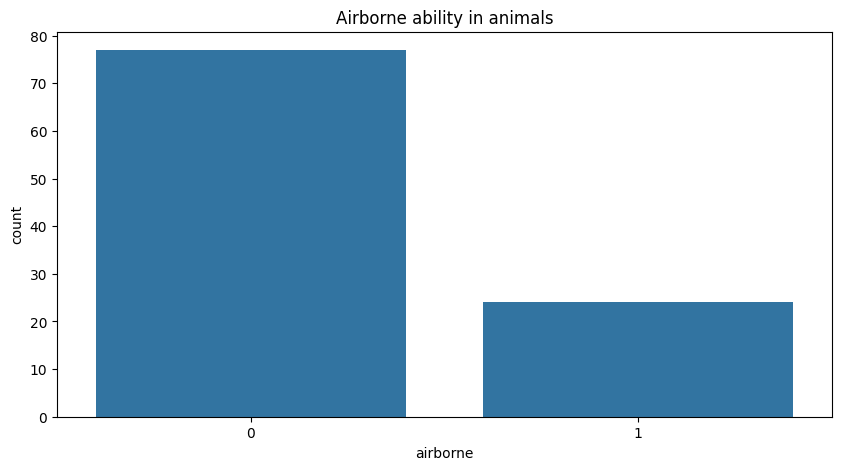

In [ ]:
sns.countplot(x='airborne', data=data)
plt.title("Airborne ability in animals")
plt.xticks(rotation=0)
plt.show()


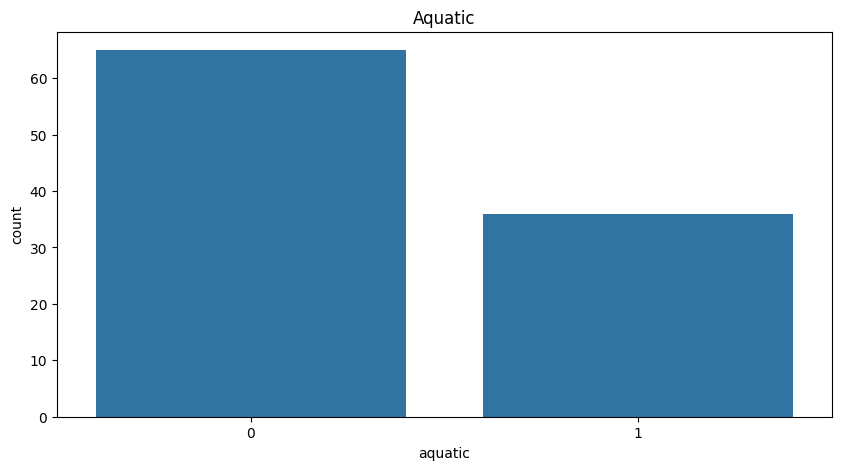

In [ ]:
sns.countplot(x='aquatic', data=data)
plt.title("Aquatic")
plt.xticks(rotation=0)
plt.show()

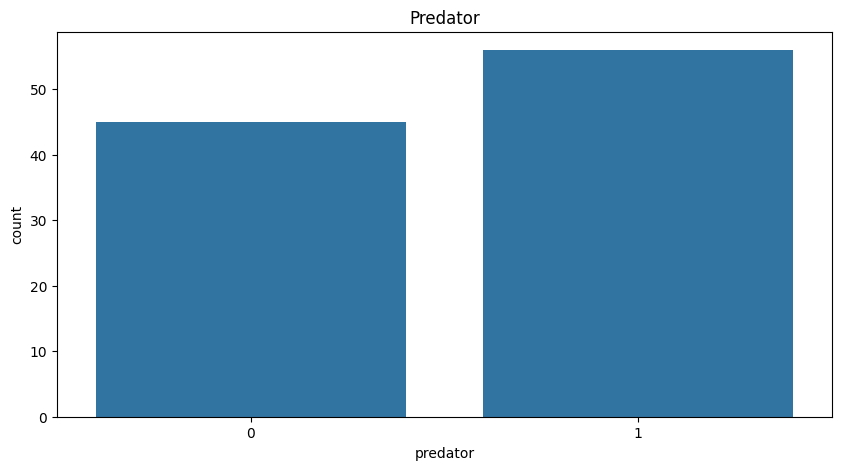

In [ ]:

sns.countplot(x='predator', data=data)
plt.title("Predator")
plt.xticks(rotation=0)
plt.show()

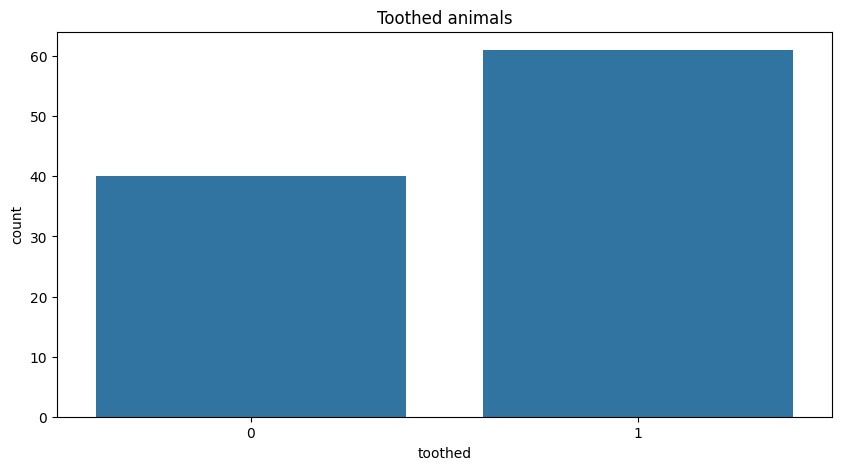

In [ ]:
sns.countplot(x='toothed', data=data)
plt.title("Toothed animals")
plt.xticks(rotation=0)
plt.show()

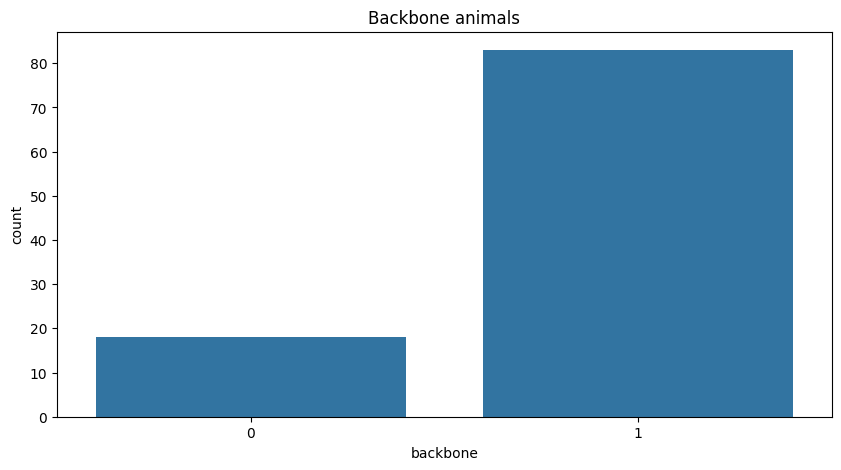

In [ ]:
sns.countplot(x='backbone', data=data)
plt.title("Backbone animals")
plt.xticks(rotation=0)
plt.show()

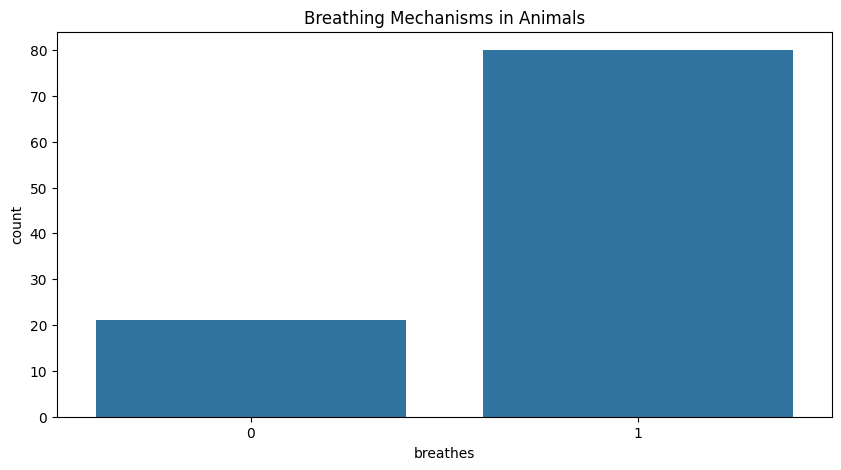

In [ ]:
sns.countplot(x='breathes', data=data)
plt.title("Breathing Mechanisms in Animals")
plt.xticks(rotation=0)
plt.show()

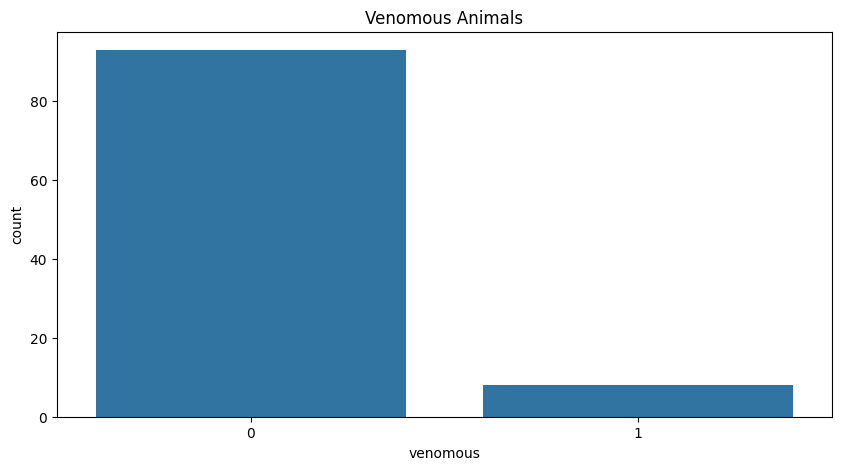

In [ ]:
sns.countplot(x='venomous', data=data)
plt.title("Venomous Animals")
plt.xticks(rotation=0)
plt.show()

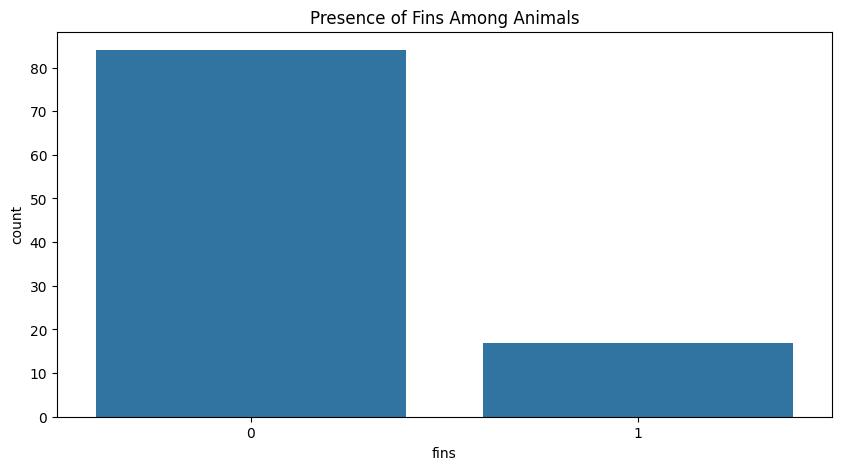

In [ ]:
sns.countplot(x='fins', data=data)
plt.title("Presence of Fins Among Animals")
plt.xticks(rotation=0)
plt.show()

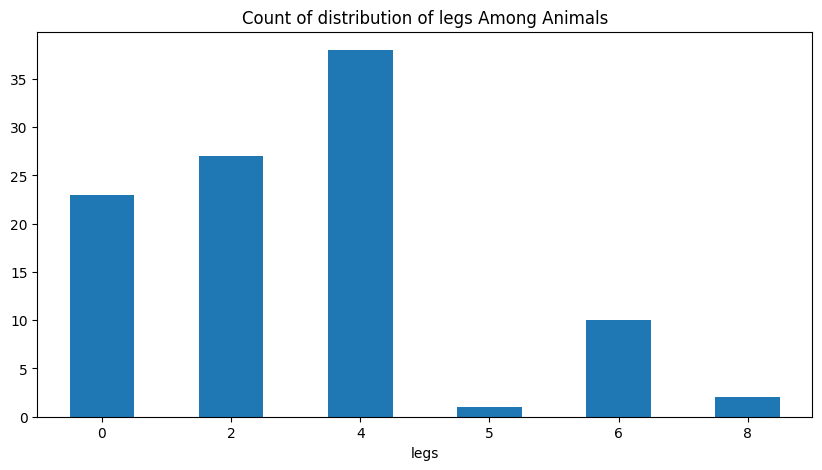

In [ ]:
data.groupby('legs').size().sort_index().plot(kind='bar')
plt.title("Count of distribution of legs Among Animals")
plt.xticks(rotation=0)
plt.show()

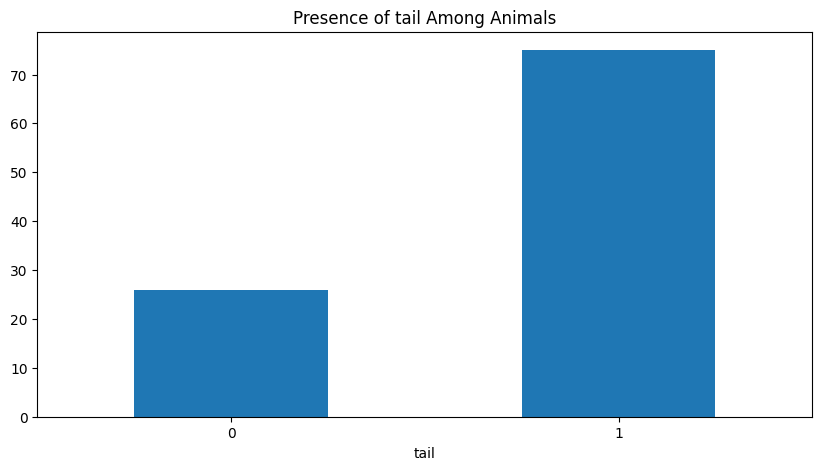

In [ ]:
data.groupby('tail').size().sort_index().plot(kind='bar')
plt.title("Presence of tail Among Animals")
plt.xticks(rotation=0)
plt.show()

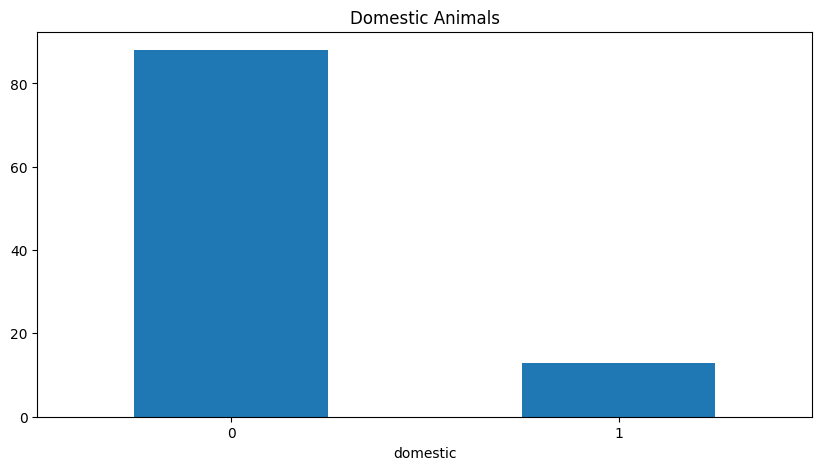

In [ ]:
data.groupby('domestic').size().sort_index().plot(kind='bar')
plt.title("Domestic Animals")
plt.xticks(rotation=0)
plt.show()

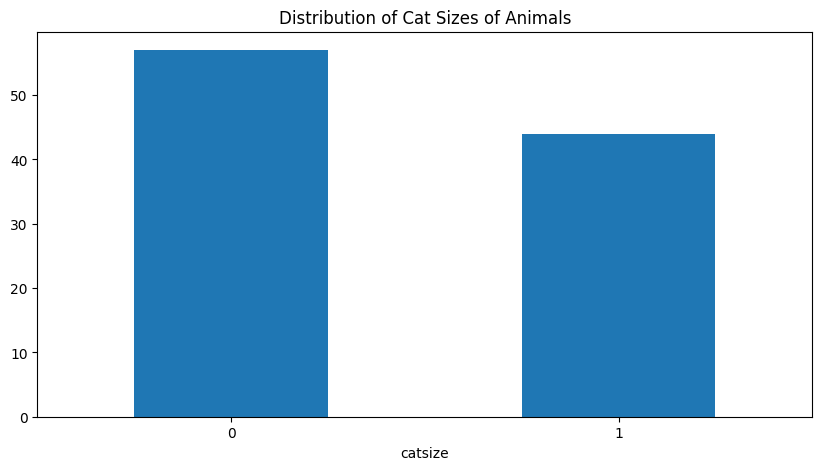

In [ ]:
data.groupby('catsize').size().sort_index().plot(kind='bar')
plt.title("Distribution of Cat Sizes of Animals")
plt.xticks(rotation=0)
plt.show()

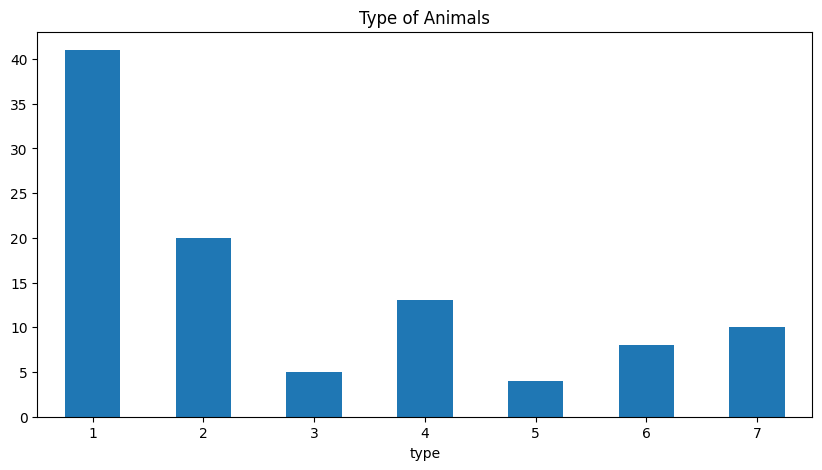

In [ ]:
data.groupby('type').size().sort_index().plot(kind='bar')
plt.title("Type of Animals")
plt.xticks(rotation=0)
plt.show()

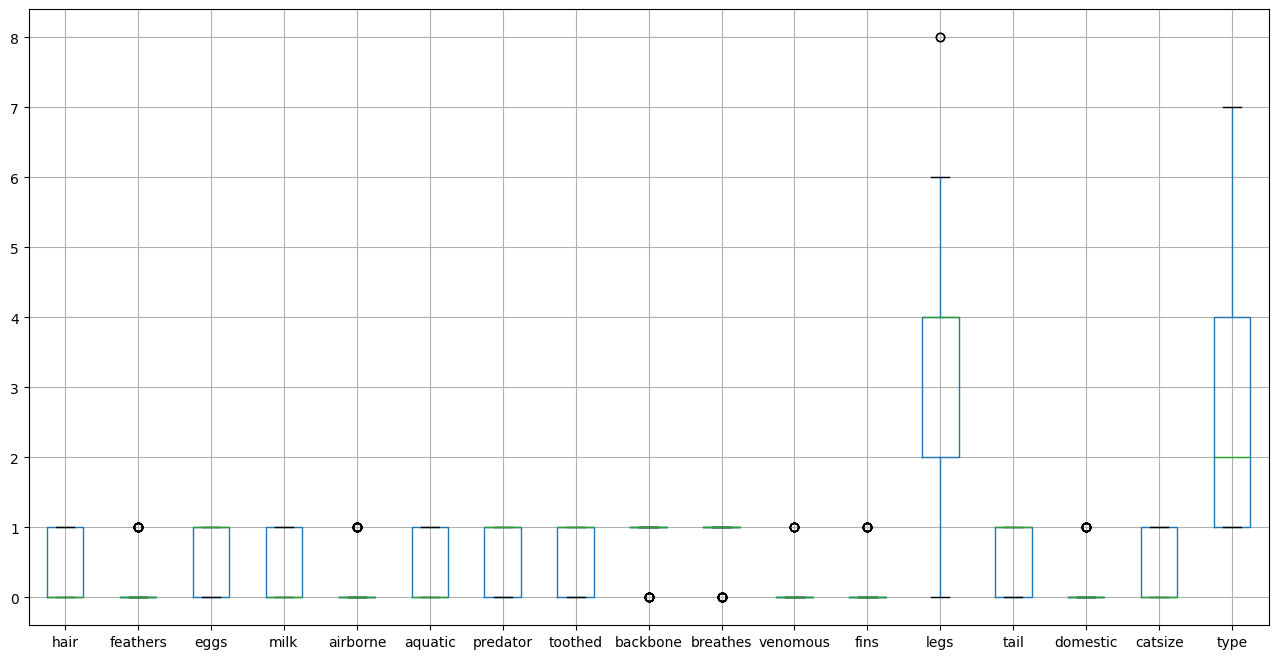

In [ ]:
plt.figure(figsize = (16,8))
data.boxplot()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = data.select_dtypes(include=['number']).columns.difference(['type'])
numeric_columns = numeric_columns.difference(['animal name'])
scaler = MinMaxScaler()

data.loc[:, numeric_columns] = scaler.fit_transform(data[numeric_columns])


<ipython-input-32-7282edbf3601>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5   0.5   0.    0.5   0.5   0.5   0.5   0.    0.    0.5   0.5   0.25
 0.    0.    0.5   0.75  0.25  0.5   0.    0.    0.25  0.25  0.5   0.25
 0.75  0.5   0.5   0.25  0.5   0.25  0.75  0.5   0.25  0.25  0.    0.5
 0.5   0.25  0.    0.75  0.75  0.25  0.75  0.25  0.5   0.5   0.75  0.5
 0.5   0.5   0.5   0.75  0.5   1.    0.5   0.5   0.25  0.25  0.25  0.25
 0.    0.    0.    0.5   0.5   0.5   0.    0.5   0.5   0.5   0.5   0.25
 1.    0.    0.    0.25  0.    0.    0.25  0.25  0.    0.    0.    0.25
 0.25  0.625 0.    0.25  0.75  0.5   0.5   0.5   0.    0.25  0.5   0.25
 0.25  0.75  0.5   0.    0.25 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [ ]:
x = data.drop(['animal name', 'type'], axis = 1)
y = data[['type']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(f'Training Accuracy: {knn.score(x_train, y_train)}')
print(f'Testing Accuracy: {knn.score(x_test, y_test)}')

Training Accuracy: 0.975
Testing Accuracy: 0.9523809523809523


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interview Question : **bold text**

1) . What are the key hyperparameters in KNN?

Ans->

1) Resampling techniques: Use oversampling (like SMOTE) to increase minority class samples or undersampling to reduce majority class samples.

2) Use appropriate evaluation metrics: Instead of accuracy, use metrics like precision, recall, F1-score, or ROC-AUC that better reflect model performance on imbalanced data.

3) Use algorithms that handle imbalance: Some models like XGBoost or balanced Random Forest have built-in options to handle class imbalance.

4) Adjust class weights: Assign higher weights to minority class during training to make the model pay more attention to it.

5) Generate synthetic data: Techniques like SMOTE create new synthetic samples of the minority class to balance the dataset.



2) . What distance metrics can be used in KNN?

Ans->
1) Euclidean Distance — The straight-line distance between two points in space. Most common for continuous variables.

2) Manhattan Distance — The sum of absolute differences along each dimension (like navigating city blocks).

3) Minkowski Distance — A generalization of Euclidean and Manhattan distances, with a parameter to adjust the order.

4)  Hamming Distance — Counts the number of positions where categorical values differ (used for categorical data).

5) Cosine Similarity — Measures the angle between two vectors, useful when direction matters more than magnitude.